# Iteration 1

In [166]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading csv files and Cleaning

In [167]:
df1 = pd.read_csv("bandoora.csv")
df1 = df1[['Year', 'Annual']] #selecting only two columns for final dataset
df1.columns = ['Year', 'Bandoora'] # changing column name from Annual to Bandoora
df1 = df1[df1['Year'] > 1990] #selecting around 30 years of data
df1['Bandoora'].fillna((df1['Bandoora'].mean()), inplace=True) #imputing null values with mean of the column

In [168]:
df2 = pd.read_csv('bendigo.csv')
df2 = df2[['Year', 'Annual']]
df2.columns = ['Year', 'Bendigo']
df2 = df2[df2['Year'] > 1990]
df2['Bendigo'].fillna((df2['Bendigo'].mean()), inplace=True) #imputing null values with mean of the column

In [169]:
df3 = pd.read_csv('echuca.csv')
df3 = df3[['Year', 'Annual']]
df3.columns = ['Year', 'Echuca']
df3 = df3[df3['Year'] > 1990]
df3['Echuca'].fillna((df3['Echuca'].mean()), inplace=True) #imputing null values with mean of the column

In [170]:
#df4 = pd.read_csv('falls creek.csv')
#df4 = df4[['Year', 'Annual']]
#df4.columns = ['Year', 'Falls Creek']
#df4 = df4[df4['Year'] > 1990]
#df4['Falls Creek'].fillna((df4['Falls Creek'].mean()), inplace=True)

In [171]:
df5 = pd.read_csv('mildura.csv')
df5 = df5[['Year', 'Annual']]
df5.columns = ['Year', 'Mildura']
df5 = df5[df5['Year'] > 1990]
df5['Mildura'].fillna((df5['Mildura'].mean()), inplace=True) #imputing null values with mean of the column

In [172]:
#df6 = pd.read_csv('portland.csv')
#df6 = df6[['Year', 'Annual']]
#df6.columns = ['Year', 'Portland']
#df6 = df6[df6['Year'] > 1990]
#df6['Portland'].fillna((df6['Portland'].mean()), inplace=True)

In [173]:
df7 = pd.read_csv('Traralgon.csv')
df7 = df7[['Year', 'Annual']]
df7.columns = ['Year', 'Traralgon']
df7 = df7[df7['Year'] > 1990]
df7['Traralgon'].fillna((df7['Traralgon'].mean()), inplace=True) #imputing null values with mean of the column

In [174]:
df8 = pd.read_csv('walpeup.csv')
df8 = df8[['Year', 'Annual']]
df8.columns = ['Year', 'Walpeup']
df8 = df8[df8['Year'] > 1990]
df8['Walpeup'].fillna((df8['Walpeup'].mean()), inplace=True) #imputing null values with mean of the column

In [175]:
df8

,Year,Walpeup
42,1991,23.60
43,1992,22.00
44,1993,23.30
45,1994,23.80
46,1995,22.60
47,1996,22.50
48,1997,23.80
49,1998,23.30
50,1999,23.50
51,2000,23.60


## Merging data frames with left join

In [176]:
df_merge = df1.merge(df2, how='left') 

In [177]:
df_merge = df_merge.merge(df3, how='left')

In [178]:
#df_merge = df_merge.merge(df4, how='left')

In [179]:
df_merge = df_merge.merge(df5, how='left')

In [180]:
#df_merge = df_merge.merge(df6, how='left')

In [181]:
df_merge = df_merge.merge(df7, how='left')

In [182]:
df_merge = df_merge.merge(df8, how='left')

In [183]:
#a = df_merge.set_index('Year')

In [184]:
a = df_merge.round(1) #rounding values to 1 decimal to get proper observations

In [185]:
a.to_csv('temp.csv') #generating new csv file with cleaned dataset

In [186]:
#df = df_merge.round(1)

In [187]:
b = pd.melt(a, id_vars = ['Year']) #using melt function for visualising data

In [188]:
b.describe()

,Year,value
count,168.000000,168.000000
mean,2004.500000,22.119643
std,8.101896,1.840634
min,1991.000000,18.600000
25%,1997.750000,20.575000
50%,2004.500000,22.000000
75%,2011.250000,23.700000
max,2018.000000,25.800000


In [189]:
d = b.groupby('Year').aggregate(np.average)
d = d.round(1)

In [190]:
# d.to_csv('temp3.csv')
d.columns

Index(['value'], dtype='object')

In [191]:
d = d.reset_index()
d['maxR'] = range(len(d))
d['minR'] = range(len(d))
d.head()

,Year,value,maxR,minR
0,1991,21.8,0,0
1,1992,20.5,1,1
2,1993,21.3,2,2
3,1994,21.7,3,3
4,1995,20.7,4,4


In [192]:
b.head()

,Year,variable,value
0,1991,Bandoora,19.7
1,1992,Bandoora,18.6
2,1993,Bandoora,19.6
3,1994,Bandoora,19.6
4,1995,Bandoora,18.7


In [193]:
diffR = [] 
for index, value in d.iterrows():
    year = value.Year
    avg = value.value
    for x, y in b.iterrows():
        if y.Year == year:
            diffR.append(float(abs(y.value - avg)))
#             print(diffR)
    d.loc[index,'maxR'] = round(max(diffR),2)
    d.loc[index,'minR'] = round(min(diffR),2)
    diffR = [] 
d.head()

,Year,value,maxR,minR
0,1991,21.8,2.3,0.5
1,1992,20.5,2.2,0.5
2,1993,21.3,2.2,0.4
3,1994,21.7,2.4,0.7
4,1995,20.7,2.5,0.6


In [194]:
d = d.set_index('Year')

In [195]:
d = d.dropna()
d.tail()

,value,maxR,minR
Year,,,
2014,23.3,2.5,0.6
2015,22.7,2.5,0.7
2016,22.5,2.3,0.6
2017,23.0,2.5,0.5
2018,23.4,2.3,0.7


In [196]:
d.to_csv("temp2.csv")

## Visualising data using seaborn library

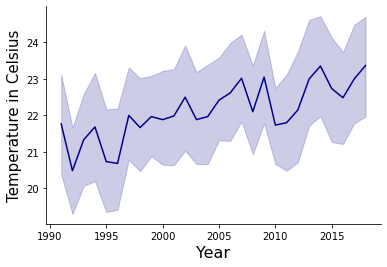

In [197]:
sns.lineplot(data=b, x='Year', y='value', color='darkblue', size_norm=(10,10))
plt.xlabel("Year", size=16)
plt.ylabel("Temperature in Celsius", size=15)
sns.despine()
plt.savefig('Temperature.png', dpi=300)